In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [12]:
#Veri setini yükleme
data = pd.read_csv('/Users/dilarabuker/Desktop/heart_disease/HeartDiseaseTrain-Test.csv')
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [16]:
# EDA - Genel bilgi ve eksik değer kontrolü
# Veri hakkında genel bilgi ve özet istatistikleri yazdırma
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

/var/folders/1t/4_v58kjs0jd3s1k3d0rc8mnm0000gn/T/ipykernel_15092/2097382795.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=data,palette='viridis')


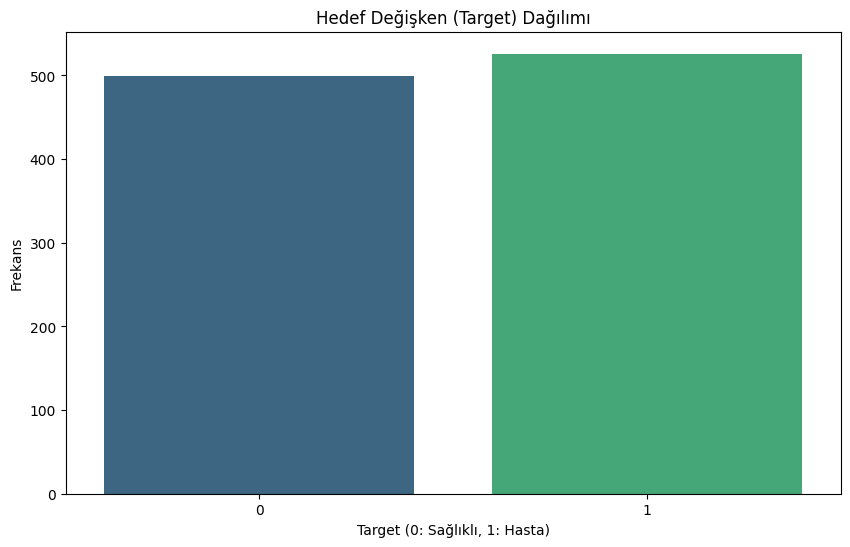

In [18]:
#hedef değişkenin dağılımını görselleştirme
#kalp hastalığı olan ve olmayan bireylerin dağılımını görselleştirme için sütun grafiği oluşturma
plt.figure(figsize=(10,6))
sns.countplot(x='target',data=data,palette='viridis')
plt.title('Hedef Değişken (Target) Dağılımı')
plt.xlabel('Target (0: Sağlıklı, 1: Hasta)')
plt.ylabel('Frekans')
plt.show()

In [21]:
# Kategorik verilerin One-Hot Encoding ile kodlanması
# Kategorik değişkenleri sayısal değerlere dönüştürme
data_encoded = pd.get_dummies(data, drop_first=True)

# Özellikler (X) ve hedef değişken (y) ayrımı
# Hedef değişkeni (target) ve özellikleri (X) ayırma
X = data_encoded.drop(columns='target')
y = data_encoded['target']

In [24]:

# Veriyi eğitim ve test setlerine ayırma (%70 eğitim, %30 test)
# Modelin performansını değerlendirmek için veri setini ikiye ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Sayısal sütunları standardize etme
# Sayısal verileri ölçeklendirme, böylece özellikler aynı aralıkta olur
scaler = StandardScaler()
numeric_columns = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [25]:
# Lojistik regresyon modelini oluşturma ve eğitme
# Kalp hastalığı tahmini için lojistik regresyon modeli eğitme
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [26]:
# Test seti ile tahmin yapma
# Test setini kullanarak tahminler yapma
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [27]:
# Performans metriklerini hesaplama
# Modelin doğruluk, hassasiyet, duyarlılık, F1 skoru ve ROC-AUC değerlerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [28]:
# Sonuçları yazdırma
# Modelin performans metriklerini ve sınıflandırma raporunu yazdırma
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.81
Precision: 0.79
Recall: 0.85
F1 Score: 0.82
ROC-AUC: 0.91
Confusion Matrix:
[[125  34]
 [ 23 126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       159
           1       0.79      0.85      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308



In [30]:
# Yeni bir veri ile test
# Gerçek bir hasta için örnek veri oluşturma
test_data = pd.DataFrame({
    'age': [55],
    'resting_blood_pressure': [140],
    'cholestoral': [240],
    'Max_heart_rate': [150],
    'oldpeak': [1.5],
    'sex_Male': [1],
    'chest_pain_type_Atypical angina': [0],
    'chest_pain_type_Non-anginal pain': [0],
    'chest_pain_type_Typical angina': [1],
    'fasting_blood_sugar_Lower than 120 mg/ml': [1],
    'exercise_induced_angina_Yes': [0],
    'slope_Flat': [0],
    'slope_Upsloping': [1],
    'vessels_colored_by_flourosopy_One': [0],
    'vessels_colored_by_flourosopy_Three': [0],
    'vessels_colored_by_flourosopy_Two': [0],
    'vessels_colored_by_flourosopy_Zero': [1],
    'thalassemia_No': [0],
    'thalassemia_Normal': [0],
    'thalassemia_Reversable Defect': [1]
})

# Eksik sütunları kontrol edip sıfır ekleme
for column in X.columns:
    if column not in test_data.columns:
        test_data[column] = 0

# Sütunları aynı sıraya getirme
test_data = test_data[X.columns]

# Yeni veriyi ölçeklendirme
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

# Tahmin yapma
new_prediction = model.predict(test_data)
new_prediction_proba = model.predict_proba(test_data)[:, 1]

# Sonuçları yazdırma
print(f"Yeni verinin tahmini: {'Hasta' if new_prediction[0] == 1 else 'Sağlıklı'}")
print(f"Kalp hastalığı olasılığı: {new_prediction_proba[0]:.2f}")


Yeni verinin tahmini: Sağlıklı
Kalp hastalığı olasılığı: 0.24
